In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

In [130]:
def hide_splines_tick_params(sp, max_sp):
    # Hide splines
    ax.spines["right"].set_visible(False)    
    ax.spines["top"].set_visible(False)
    # Only show 0, 50, and 100 y-ticks
    ax.set_yticks([0, 50, 100]) 
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    if sp == max_sp:
        ax.tick_params(bottom="off", top="off", left="off", right="off")
    else:
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')

In [78]:
def set_x_y_lims(x_lower, x_upper, y_lower, y_upper):
    ax.set_xlim(x_lower, x_upper)
    ax.set_ylim(y_lower, y_upper)

In [81]:
def plot_set_title(cat, sp):
    ax.plot(women_degrees['Year'], women_degrees[cat[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[cat[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.set_title(cat[sp])

In [95]:
def set_labels(sp, max_sp, first_men, first_women, last_men, last_women):
    if sp == 0:
        ax.text(2001, first_men, 'Men')
        ax.text(2001, first_women, 'Women')
    elif sp == max_sp:
        ax.text(2001, last_men, 'Men')
        ax.text(2001, last_women, 'Women')

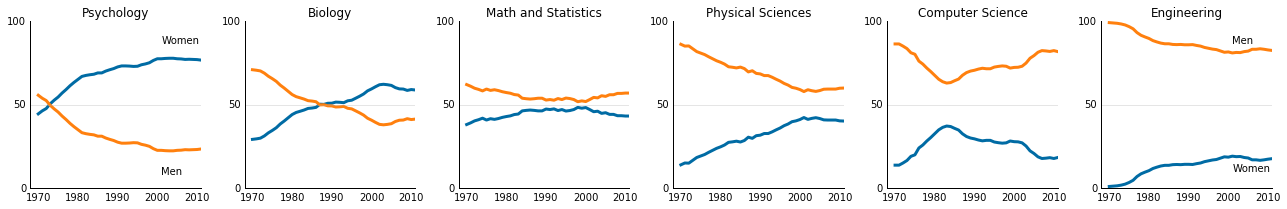

In [131]:
fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    plot_set_title(stem_cats, sp)
    hide_splines_tick_params(5, 5)
    set_x_y_lims(1968, 2011, 0, 100)
    set_labels(sp, 5, 8, 87, 87, 10)
    
plt.tight_layout()
plt.show()

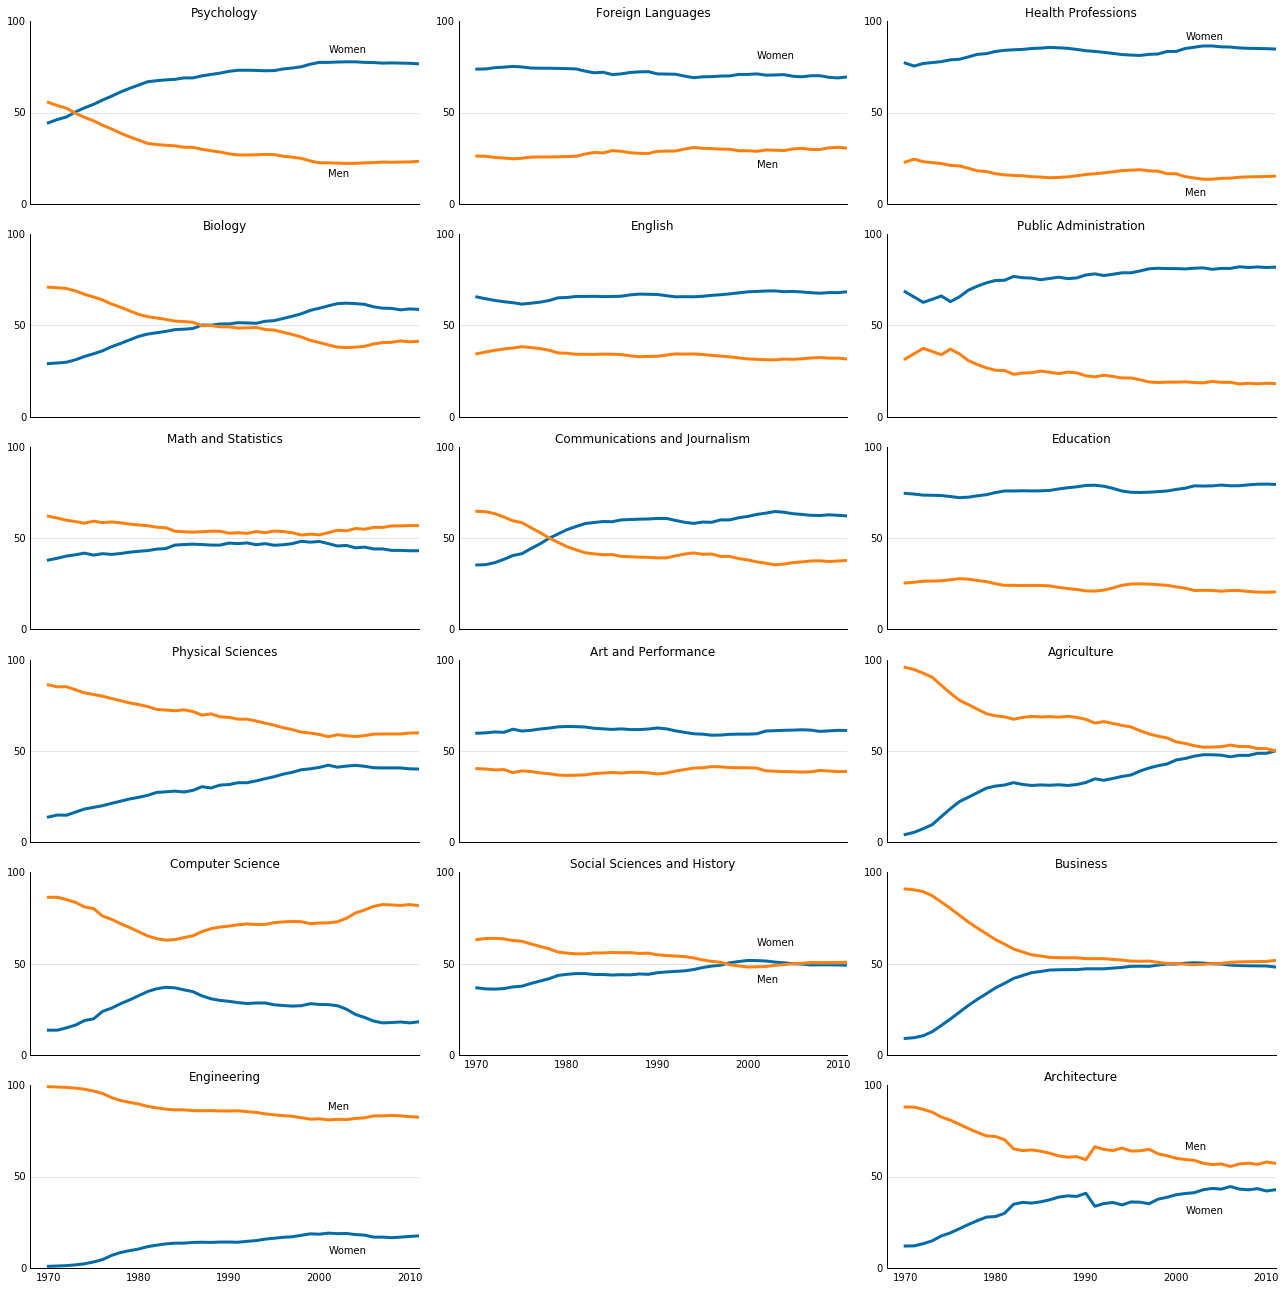

In [133]:
fig2 = plt.figure(figsize=(18, 18))

# STEM
for sp in range(0,6):
    ax = fig2.add_subplot(6,3,(sp*3)+1)
    plot_set_title(stem_cats, sp)
    hide_splines_tick_params(sp, 5)
    set_x_y_lims(1968, 2011, 0, 100)
    set_labels(sp, 5, first_men=15, first_women=83, last_men=87, last_women=8)
    
# Liberal Arts
for sp in range(0,5):
    ax = fig2.add_subplot(6,3,(sp*3)+2)
    plot_set_title(lib_arts_cats, sp)
    hide_splines_tick_params(sp, 4)
    set_x_y_lims(1968, 2011, 0, 100)
    set_labels(sp, 4, first_men=20, first_women=80, last_men=40, last_women=60)

# Other        
for sp in range(0,6):
    ax = fig2.add_subplot(6,3,(sp*3)+3)
    plot_set_title(other_cats, sp)
    hide_splines_tick_params(sp, 5)
    set_x_y_lims(1968, 2011, 0, 100)
    set_labels(sp, 5, first_men=5, first_women=90, last_men=65, last_women=30)
    
plt.tight_layout()
plt.savefig('gender_degrees.png')
plt.show()